### Questão 2
Dada a função objetivo $S(x_1, x_2) = 7,5x_1^2 + 12x_2^2 - 3x_1^2x_2^2 + 18x_1 + 11$, determine a localização e a natureza (mínimo, máximo ou sela) dos seus pontos estacionários.

Esboce o gráfico da superfície da função objetivo em função de $x_1$ e $x_2$ e outro gráfico com 50 curvas de níveis, ambos contendo todos os pontos estacionários encontrados. Indique no segundo gráfico a localização dos pontos estacionários.

In [1]:
import sympy as sp

# Defining the variables
x1, x2 = sp.symbols('x1 x2')

# Defining the function S(x1, x2)
S = 7.5*(x1**2) + 12*(x2**2) - 3*(x1**2)*(x2**2) + 18*x1 + 11

# Calculating the gradient
grad_S = [sp.diff(S, var) for var in (x1, x2)]
grad_S

[-6*x1*x2**2 + 15.0*x1 + 18, -6*x1**2*x2 + 24*x2]

In [2]:
# Solving the system where the gradient is zero
stationary_points = sp.solve(grad_S, (x1, x2))
stationary_points


[(-2.00000000000000, -1.00000000000000),
 (-2.00000000000000, 1.00000000000000),
 (-1.20000000000000, 0.0),
 (2.00000000000000, -2.00000000000000),
 (2.00000000000000, 2.00000000000000)]

In [3]:
# Calculating the Hessian matrix for the corrected function
Hessian = sp.hessian(S, (x1, x2))
Hessian

Matrix([
[15.0 - 6*x2**2,    -12*x1*x2],
[     -12*x1*x2, 24 - 6*x1**2]])

In [4]:
# Calculate eigenvalues for each stationary point
eigenvalues_at_points = []
for point in stationary_points:
    # substituting point in Hessian
    hessian_at_point = Hessian.subs({x1: point[0], x2: point[1]})
    #print(hessian_at_point)
    eigenvalues = hessian_at_point.eigenvals()
    #print(eigenvalues)
    eigenvalues_at_points.append(eigenvalues)

# Display the stationary points along with their corresponding eigenvalues
stationary_points, eigenvalues_at_points

([(-2.00000000000000, -1.00000000000000),
  (-2.00000000000000, 1.00000000000000),
  (-1.20000000000000, 0.0),
  (2.00000000000000, -2.00000000000000),
  (2.00000000000000, 2.00000000000000)],
 [{28.9182308941496: 1, -19.9182308941496: 1},
  {28.9182308941496: 1, -19.9182308941496: 1},
  {15.0000000000000: 1, 15.3600000000000: 1},
  {-52.7104760399646: 1, 43.7104760399646: 1},
  {-52.7104760399646: 1, 43.7104760399646: 1}])


Pontos Estacionários e Natureza: 

1. Ponto Estacionário: $(-2, -1)$ 
- Autovalores da Matriz Hessiana: $28.92$ e $-19.92$ 
- Natureza: Ponto de sela

2. Ponto Estacionário: $(-2, 1)$ 
- Autovalores da Matriz Hessiana: $28.92$ e $-19.92$ 
- Natureza: Ponto de sela

3. Ponto Estacionário: $(-1.2, 0)$ 
- Autovalores da Matriz Hessiana: $15.00$ e $15.36$ 
- Natureza: Mínimo local

4. Ponto Estacionário: $(2, -2)$ 
- Autovalores da Matriz Hessiana: $-52.71$ e $43.71$ 
- Natureza: Ponto de sela

5. Ponto Estacionário: $(2, 2)$ 
- Autovalores da Matriz Hessiana: $-52.71$ e $43.71$ 
- Natureza: Ponto de sela

Dos pontos estacionários encontrados, o ponto $(-1.2, 0)$ é um mínimo local, enquanto os demais são pontos de sela.

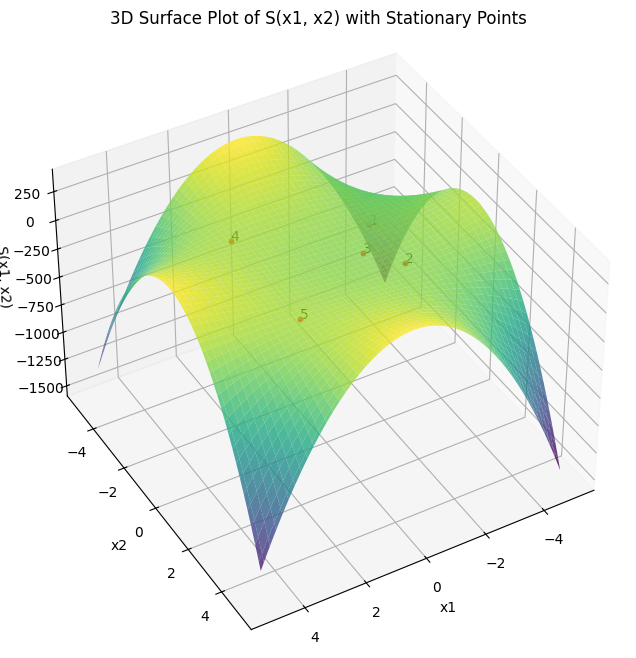

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert sympy function to numpy function for plotting
S_lambdified = sp.lambdify((x1, x2), S, "numpy")

# Create a meshgrid for plotting
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = S_lambdified(X1, X2)

# Plotting the 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

# Plotting the stationary points with annotations
for idx, point in enumerate(stationary_points):
    point_numeric = [float(p) for p in point]
    ax.scatter(point_numeric[0], point_numeric[1], S_lambdified(point_numeric[0], point_numeric[1]), color='r', s=10)
    ax.text(point_numeric[0], point_numeric[1], S_lambdified(point_numeric[0], point_numeric[1]), f'{idx+1}', color='black')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('S(x1, x2)')
ax.set_title('3D Surface Plot of S(x1, x2) with Stationary Points')


# Rotating the plot
ax.view_init(elev=40, azim=60)  # Adjust these values to set the elevation and azimuthal angles

plt.show()

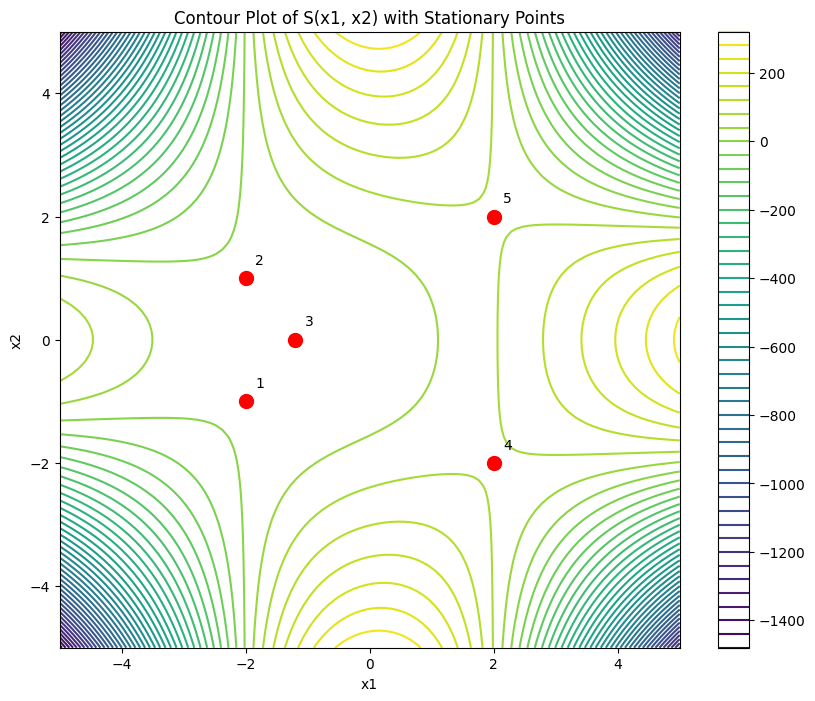

In [6]:

# Plotting the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)

# Plotting the stationary points with annotations
for idx, point in enumerate(stationary_points):
    point_numeric = [float(p) for p in point]
    plt.plot(point_numeric[0], point_numeric[1], 'ro', markersize=10)
    plt.annotate(f'{idx+1}', (point_numeric[0], point_numeric[1]), textcoords="offset points", xytext=(10, 10), ha='center', color='black')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot of S(x1, x2) with Stationary Points')
plt.show()